In [87]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import scipy

%matplotlib inline
from matplotlib import pyplot as plt
from scipy import sparse

In [11]:
train_df = pd.read_csv('../../data/howpop_train.csv')
test_df  = pd.read_csv('../../data/howpop_test.csv')

In [31]:
train_df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


Есть ли в train_df признаки, корреляция между которыми больше 0.9? Обратите внимание, именно различные признаки - корреляция признака с самим собой естественно больше 0.9 :)

In [24]:
heat_matr = train_df.drop(['url', 'domain', 'author', 'title'], axis=1).corr()

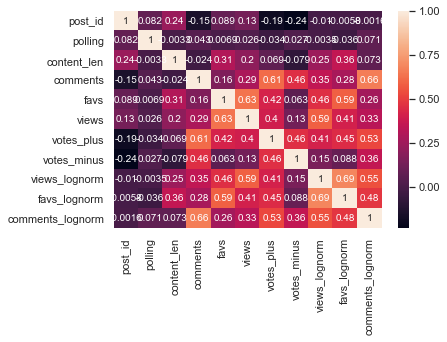

In [25]:
sns.heatmap(heat_matr, annot=True);

В каком году было больше всего публикаций? (Рассматриваем train_df)

In [30]:
train_df['published'].apply(lambda x: x[0:4]).value_counts()

2015    23452
2016    16316
2014    16180
2012    15972
2013    15537
2011    15063
2010    13091
2009    10783
2008     7743
Name: published, dtype: int64

In [32]:
features = ['author', 'flow', 'domain','title']
train_size = int(0.7 * train_df.shape[0])

In [33]:
X, y = train_df.loc[:, features],  train_df['favs_lognorm'] #отделяем признаки от целевой переменной

X_test = test_df.loc[:, features]

In [34]:
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:,:]

y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]

## TfidfVectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vect = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 3))

In [38]:
X_train.head()

,author,flow,domain,title
0,@Tapac,develop,habrahabr.ru,Новогодний подарок блоггерам — WordPress 2.3.2
1,@DezmASter,design,habrahabr.ru,"Сумасшедшие яйца, или сервис для отслеживания ..."
2,@DezmASter,design,habrahabr.ru,"Сумасшедшие яйца, или сервис для отслеживания ..."
3,@Taoorus,design,habrahabr.ru,"Сглаживание шрифтов, и субпиксельная отрисовка"
4,@dennydo,NaN,geektimes.ru,Почему мне не нравится iPhone


In [65]:
vect_x_train = vect.fit_transform(X_train['title'])

In [66]:
vect_x_valid, vect_x_test = vect.transform(X_valid['title']), vect.transform(X_test['title'])

In [80]:
vect_x_valid.shape, \
vect_x_test.shape, \
vect_x_train.shape

((40242, 50624), (3990, 50624), (93895, 50624))

In [68]:
vect.vocabulary_['python']

9065

In [114]:
char_vec = TfidfVectorizer(analyzer='char')

In [115]:
char_x_train = char_vec.fit_transform(X_train['title'])

In [116]:
char_x_valid, char_x_test = char_vec.transform(X_valid['title']), char_vec.transform(X_test['title'])

In [117]:
char_x_valid.shape, \
char_x_test.shape, \
char_x_train.shape

((40242, 218), (3990, 218), (93895, 218))